# COMP7095 - Big Data Management

## Spark Lab 1: Introduction to Spark

### Introduction
Spark is a general framework for distributed computing that offers high performance for both batch and interactive processing. It supports higher-level tools for SQL and structured data processing, machine learning, graph processing, and stream processing. It exposes APIs for Java, Python, and Scala. In our labs, we mainly use it with Python.

## Hand on
We are going to use PySpark to load the data from a data file in TSV format and adopt PySpark to do some simply analysis. 

The file named as "moview_reviews.tsv" can be downloaded from the course moodle, too. 

Using the following code segments to understand how PySpark works.

The size of the data file is around 65MB. and the following is the partial layout of the data file:
```
review\tsentiment
One of the other reviewer...\tpositive
A wonderful little produc...\tpositive
I thought this was a wond...\tpositive
Basically there's a famil...\tnegative
...
```

Note that values are seperated by a tab ('\t').

Import the required packages and get the instance of the Spark context:

In [1]:
from pyspark import *
from operator import add

sc = SparkContext.getOrCreate()

Define a function to split the values (review and sentiment) of each line.

In [2]:
def preprocess(line):
    review, sentiment = line.split('\t')
    return sentiment, review

#### Task 1: Load the data file and create a resilient distributed data (RDD) object. Please complete your code as follows.

In [3]:
print(sc.version)

rdd = sc.textFile('movie_reviews.tsv')


3.3.1


Use the `filter` function to ignore the header row and flip the data to the `preprocess` function. Then, a new RDD object will be created.
The `count` function returns the number of rows stored in the RDD object.

In [4]:
reviews = rdd.filter(lambda x: x != 'review\tsentiment').map(preprocess)
reviews.count()

50000

We can also check what are stored in the RDD object by using the take function. Here we use the `take` function with 1 to get the first item. The parameter represents how many items you want to get from the RDD object.

In [5]:
reviews.take(1)

[('positive',
  "One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me. The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word. It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away. I would say the main appeal of the show is due to the fact that it goes w

Next, we use `filter` function to retrieve all rows with the positive sentiment and create a new RDD object. And, it stores the reviews without the sentiments.
Let's also check how many positive reviews!

In [6]:
posReviews = reviews.filter(lambda x: x[0] == 'positive').map(lambda x: x[1])
posReviews.count()

25000

#### Task 2: Please take the first row of positive reviews. Please complete your code as follows.

In [7]:
posReviews.take(1)

["One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me. The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word. It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away. I would say the main appeal of the show is due to the fact that it goes where other show

#### Task 3: Please a new RDD object for negative reviews. Please complete your code as follows.

In [8]:
negReviews = reviews.filter(lambda x: x[0] == 'negative').map(lambda x: x[1])
negReviews.count()

25000

In [9]:
negReviews.take(1)

["Basically there's a family where a little boy (Jake) thinks there's a zombie in his closet & his parents are fighting all the time. This movie is slower than a soap opera... and suddenly, Jake decides to become Rambo and kill the zombie. OK, first of all when you're going to make a film you must Decide if its a thriller or a drama! As a drama the movie is watchable. Parents are divorcing & arguing like in real life. And then we have Jake with his closet which totally ruins all the film! I expected to see a BOOGEYMAN similar movie, and instead i watched a drama with some meaningless thriller spots. 3 out of 10 just for the well playing parents & descent dialogs. As for the shots with Jake: just ignore them."]

Besides, we can find the word frequency using the following simple steps:
1. Define a function for splitting each line. It returns a list of words.

In [10]:
def splitWords(line):
    values = line.replace(',', ' ').replace('.', ' ').replace('"', '').split(' ')
    data = []
    for v in values:
        if len(v) > 0:
            data.append(v)
    return data

2. Create a new RDD object from the original RDD object by using the `filter` function and the `splitWords` function.

In [11]:
wordcounts = rdd.filter(lambda x: x != 'review\tsentiment').flatMap(splitWords).map(lambda w: (w, 1)).reduceByKey(add)

3. We sort data by the frequency (x[1], the column with index 1) in descending order and retrieve 10 items.

In [12]:
wordcounts.takeOrdered(10, key=lambda x: -x[1])

[('the', 570809),
 ('a', 307743),
 ('and', 305333),
 ('of', 284612),
 ('to', 263285),
 ('is', 207943),
 ('in', 172137),
 ('I', 142658),
 ('that', 131710),
 ('it', 128478)]

After creating a Spark context, we can check its running status by browsing `localhost:4040`.
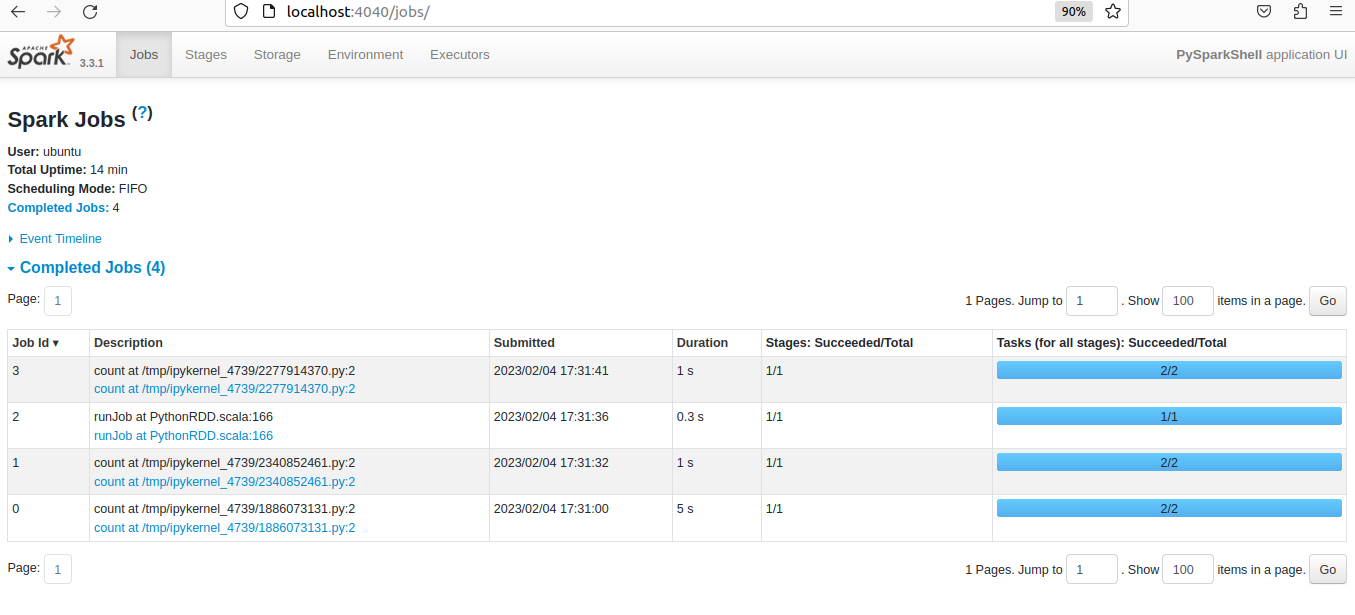

## After using Spark
In the end, we should stop the Spark by using the `stop` function.

In [13]:
sc.stop()